In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import os

os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/MLB Season Model/') # wd

In [13]:
df = pd.read_csv('./data/full_data.csv')

#### exploring year to year % change in bat speed

In [14]:
age_swing_speed = df[['Age', 'avg_swing_speed', 'Name']]
age_swing_speed = age_swing_speed.dropna(subset=['avg_swing_speed'])
age_swing_speed['change'] = age_swing_speed.groupby('Name')['avg_swing_speed'].pct_change(1) * 100
age_swing_speed.sort_values(['Name', 'Age'])
print(f"Mean and Median % change yr/yr for player to player swing speed \n{age_swing_speed['change'].dropna().agg(['mean', 'median'])}")

Mean and Median % change yr/yr for player to player swing speed 
mean     -0.116409
median   -0.137174
Name: change, dtype: float64


In [15]:
print(f"Leauge AVG batspeed by Age \n {age_swing_speed.groupby('Age')['avg_swing_speed'].mean()}") # by age

Leauge AVG batspeed by Age 
 Age
19.0    78.300000
20.0    72.733333
21.0    72.073684
22.0    72.143478
23.0    71.383582
24.0    71.535052
25.0    71.270000
26.0    71.049231
27.0    71.030000
28.0    70.642105
29.0    70.479612
30.0    71.294937
31.0    71.996970
32.0    70.943333
33.0    70.516000
34.0    69.759459
35.0    70.045000
36.0    71.036364
37.0    71.144444
38.0    69.166667
39.0    66.900000
40.0    68.200000
Name: avg_swing_speed, dtype: float64


#### Max EV Change

In [16]:
age_max_ev = df[['Age', 'Name', 'PA', 'maxEV']]
age_max_ev = age_max_ev.dropna(subset=['maxEV'])
age_max_ev = age_max_ev[age_max_ev['PA'] > 100]
age_max_ev['change'] = age_max_ev.groupby('Name')['maxEV'].pct_change(1) 
age_max_ev.sort_values(['Name', 'Age'])
print(f"Mean and Median % change yr/yr for player to player swing speed \n{age_max_ev['change'].dropna().agg(['mean', 'median'])}")

Mean and Median % change yr/yr for player to player swing speed 
mean     -0.000316
median   -0.000302
Name: change, dtype: float64


<p> logically I though this stats would be the most effected by aging as they are highly related to quick twitch muscle which declines with age. </n> These trends exist however sample bias is likley present as these metrics are highly realted with preformance so when people start to struggle with this they retire causing the average to not decrease as much <p>

#### Exploring this for all stats

In [ ]:
def aging(df, col): # what is the precent change by year, not seperated by age
    curve = df[['Age', 'Name', 'PA', col]]
    curve = curve.dropna(subset=[col])
    curve = curve.dropna(subset=['Age'])
    curve = curve[curve['PA'] > 200]
    curve['change'] = curve.groupby('Name')[col].pct_change(1) * 100 
    return curve['change'].median()


In [ ]:
def age_avg(cols): # average for each age for each stat
    age = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum()) # take the weighted avg
    return age

In [ ]:
def age_avg_precent(cols): # what precent does something change by, in the previous year
    curve = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum())  # weighted average
    curve = curve.pct_change(1) * 100  # calculate percent change from previous row
    return curve


precent change in each stat

In [47]:
aging_curves = pd.DataFrame(columns=['Stat', 'Curve'])
for cols in df.columns:
    try:
        pd.to_numeric(df[cols])
        if cols not in ['Unnamed: 0', 'Season', 'MLBAMID', 'PA', 'Age']:  # exclude uneeded numeric
            new = {'Stat': cols, 'Curve': aging(df, cols)}
            aging_curves = pd.concat([aging_curves, pd.DataFrame([new])], ignore_index=True)
    except Exception:
        continue

print(f" \n precent decrease by year \n {aging_curves.head(30)}")

C:\Users\dalto\AppData\Local\Temp\ipykernel_22772\4164406583.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aging_curves = pd.concat([aging_curves, pd.DataFrame([new])], ignore_index=True)


 
 precent decrease by year 
                     Stat      Curve
0                    BB%   0.895620
1                     K%   0.559054
2                  BABIP  -1.745895
3                   wRC+  -2.214839
4                    BsR -37.793349
5                    Def -23.806492
6                    WAR -21.265685
7                Barrel%   2.845776
8                  maxEV  -0.060422
9               HardHit%   0.952658
10              O-Swing%   0.379980
11              Z-Swing%   0.459925
12            O-Contact%  -0.262355
13            Z-Contact%  -0.048849
14              Contact%  -0.289850
15                SwStr%   0.868389
16                  CSW%   0.259391
17                  xslg  -1.884256
18                 xwoba  -1.079262
19       avg_swing_speed   0.000000
20       fast_swing_rate  -1.117318
21    sweet_spot_percent  -0.663571
22    barrel_batted_rate  -1.396594
23  solidcontact_percent   1.449580
24      hard_hit_percent   0.000000
25        avg_best_speed  -0.02713

In [ ]:
age_precent_change = pd.DataFrame()
for cols in df.columns:
    try:
        pd.to_numeric(df[cols])
        if cols not in ['Unnamed: 0', 'Season', 'MLBAMID', 'PA', 'Age']:
            age_series = age_avg_precent(cols)
            age_precent_change[cols] = age_series
    except Exception as e:
        continue


In [66]:
age_precent_change.head(30)

,BB%,K%,BABIP,wRC+,BsR,Def,WAR,Barrel%,maxEV,HardHit%,...,fast_swing_rate,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,n_outs_above_average,sprint_speed
Age,,,,,,,,,,,,,,,,,,,,,
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20.0,-40.667504,8.195390,-4.074658,-15.145572,47.498088,-63.042783,-25.470317,-13.043867,-0.587608,-1.491462,...,56.466222,-15.902274,-23.972394,-24.188850,-23.470226,-26.038567,-25.988078,-12.760086,-132.220330,-23.237820
21.0,-13.558793,7.250967,-4.216995,-15.675091,-0.827604,-134.967213,-25.553946,-18.172396,-1.183487,-7.140963,...,4.255867,-7.545510,-23.569259,-17.602122,-14.641317,-9.691377,-9.384821,-10.456451,-92.454130,-9.289772
22.0,4.093853,-3.548733,0.250607,2.242748,34.470917,-17.360680,23.271028,1.383108,-0.540284,-3.708230,...,2.251141,-2.508512,-5.593515,-2.230452,-6.530605,-1.608391,-1.280012,-1.021351,461.025926,-1.363031
23.0,-1.280738,3.888035,-0.867588,-4.660895,-41.082932,-43.211041,-24.042579,-3.387297,-0.110819,1.822042,...,-26.178246,-6.671031,-9.346236,-8.209025,-5.171024,-6.307977,-6.294022,-5.586518,-74.817772,-7.009823
24.0,-0.492908,-0.767121,-0.232635,0.339474,-27.367498,-36.320621,-3.640055,0.302098,-0.187903,-2.562449,...,-23.585768,10.478333,7.512848,5.573712,4.279600,6.708809,6.847893,3.713560,-21.881908,6.456833
25.0,2.948592,-4.368341,-1.779692,0.115009,-19.275362,-120.566459,6.470467,-1.863485,-0.033710,-0.613507,...,10.245021,0.311733,2.103591,1.789712,2.320289,1.698346,1.661879,0.200416,-8.970044,0.933785
26.0,-0.706283,0.332957,0.688287,1.034838,-30.125844,-60.991285,1.852602,-0.100668,-0.027089,0.251676,...,-8.564967,4.362378,2.271867,6.865820,2.861837,3.037457,3.044519,3.350810,-12.645998,3.044842
27.0,0.586327,-1.908874,-1.151734,0.513223,-12.922826,-747.884497,1.940867,-0.425160,-0.048612,-0.840306,...,-16.692242,-0.623876,-2.352267,-3.908821,-1.792332,-0.207653,-0.158485,-2.102283,103.354094,-0.627751


different stats by age

In [56]:
stats_by_age = pd.DataFrame()
for cols in df.columns:
    try:
        pd.to_numeric(df[cols])
        if cols not in ['Unnamed: 0', 'Season', 'MLBAMID', 'PA', 'Age']:
            age_series = age_avg(cols)
            stats_by_age[cols] = age_series
    except Exception as e:
        continue


C:\Users\dalto\AppData\Local\Temp\ipykernel_22772\3160512735.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum())
C:\Users\dalto\AppData\Local\Temp\ipykernel_22772\3160512735.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age = df.groupby('Age').apply(lambda x: (x[cols] * x['PA']).sum() / x['PA'].sum())
C:\Users\dalto\App

In [35]:
# moved to its own cell bc of annoying lamaba warnings 
stats_by_age['Age'] = stats_by_age.index # move to its own col so corr can be done
stats_by_age = stats_by_age.reset_index(drop=True)
stats_by_age = stats_by_age[['Age'] + [col for col in stats_by_age.columns if col != 'Age']]
stats_by_age.head(26)

,Age,BB%,K%,BABIP,wRC+,BsR,Def,WAR,Barrel%,maxEV,...,fast_swing_rate,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,n_outs_above_average,sprint_speed
0,19.0,0.152830,0.201887,0.333952,140.859508,0.826368,-7.259651,3.428286,0.102225,113.540479,...,4.972075,29.101509,9.915472,6.804151,42.206792,101.342265,94.905096,22.843396,-5.592453,27.295094
1,20.0,0.090678,0.218432,0.320345,119.525529,1.218876,-2.682965,2.555090,0.088891,112.873307,...,7.779619,24.473708,7.538496,5.158305,32.300763,74.954192,70.241086,19.928559,1.801907,20.952309
2,21.0,0.078383,0.234271,0.306836,100.789793,1.208789,0.938158,1.902164,0.072737,111.537465,...,8.110709,22.627042,5.761728,4.250334,27.571506,67.690098,63.649086,17.844739,0.135970,19.005888
3,22.0,0.081592,0.225957,0.307605,103.050254,1.625469,0.775287,2.344817,0.073743,110.934847,...,8.293292,22.059439,5.439445,4.155532,25.770919,66.601377,62.834370,17.662482,0.762824,18.746831
4,23.0,0.080547,0.234742,0.304936,98.247190,0.957679,0.440278,1.781063,0.071245,110.811909,...,6.122254,20.587847,4.931062,3.814404,24.438299,62.400178,58.879561,16.675764,0.192096,17.432712
5,24.0,0.080150,0.232942,0.304227,98.580714,0.695586,0.280366,1.716231,0.071461,110.603690,...,4.678273,22.745111,5.301525,4.027007,25.484160,66.586486,62.911571,17.295029,0.150062,18.558313
6,25.0,0.082513,0.222766,0.298812,98.694091,0.561509,-0.057661,1.827279,0.070129,110.566406,...,5.157563,22.816015,5.413047,4.099079,26.075466,67.717355,63.957085,17.329691,0.136601,18.731607
7,26.0,0.081931,0.223508,0.300869,99.715414,0.392350,-0.022493,1.861131,0.070058,110.536455,...,4.715820,23.811335,5.536025,4.380515,26.821704,69.774240,65.904271,17.910375,0.119327,19.301955
8,27.0,0.082411,0.219241,0.297404,100.227177,0.341647,0.145728,1.897253,0.069760,110.482721,...,3.928644,23.662782,5.405802,4.209288,26.340970,69.629352,65.799822,17.533849,0.242656,19.180787
9,28.0,0.085302,0.220653,0.294502,99.763421,0.161872,0.090590,1.871214,0.071538,110.404617,...,4.189554,23.476381,5.503071,4.243787,26.709819,69.770859,65.917267,17.764482,0.150908,19.123886


In [45]:
# ioslate age to between 24 and 36, as younger and older you start dealing with outlier case
stats_by_age = stats_by_age[(stats_by_age['Age'] > 23) & (stats_by_age['Age'] < 37)]
print(f"age and stats \n{stats_by_age.corr()['Age'].sort_values(ascending=False)}") 

age and stats 
Age                     1.000000
BB%                     0.914427
Contact%                0.902699
Z-Contact%              0.855528
O-Contact%              0.853410
HardHit%                0.325110
wRC+                   -0.357182
solidcontact_percent   -0.408288
fast_swing_rate        -0.495793
Barrel%                -0.507030
hard_hit_percent       -0.569492
avg_swing_speed        -0.604679
xwoba                  -0.631823
xslg                   -0.658737
sweet_spot_percent     -0.674184
CSW%                   -0.688806
barrel_batted_rate     -0.706110
avg_hyper_speed        -0.706975
avg_best_speed         -0.707770
WAR                    -0.780048
maxEV                  -0.791814
whiff_percent          -0.803667
sprint_speed           -0.827443
BABIP                  -0.837741
Z-Swing%               -0.856365
n_outs_above_average   -0.860679
O-Swing%               -0.913661
SwStr%                 -0.924015
Def                    -0.925979
K%                     -0.96

#### Highlighting Key Age Decreases 

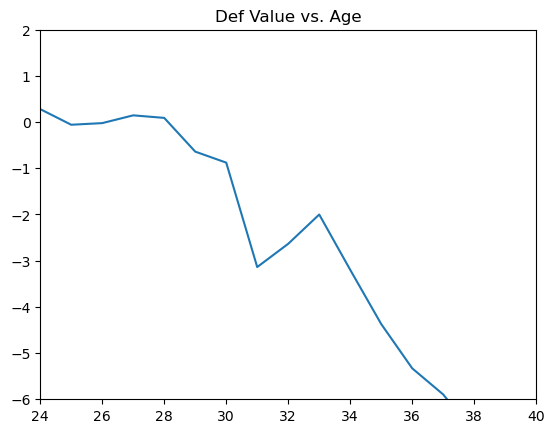

In [22]:
# calcuating defense is a very hard problem (kinda) and I do not wanna tackle it in this project. I am more intrested in building out a monte carlo simulation and a future year model. I will use OAA and Def as my def stats for value even though they have issues.
plt.plot(stats_by_age.index, stats_by_age['Def'])
plt.ylim(-6, 2)
plt.xlim(24, 40)
plt.title('Def Value vs. Age')
plt.show()
# age is a very important metric in predecting future age value

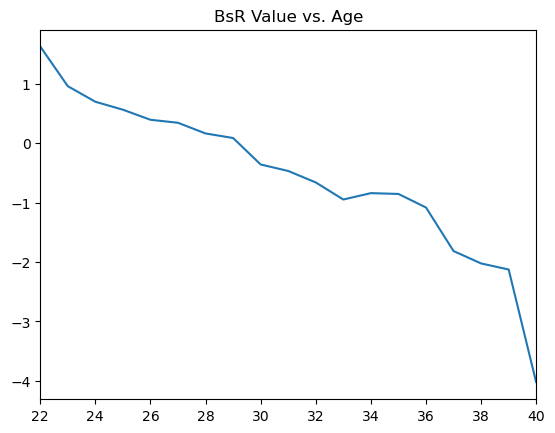

In [ ]:
plt.plot(stats_by_age.index, stats_by_age['BsR'])
plt.xlim(22, 40)
plt.title('BsR Value vs. Age')
plt.show()

Somewhat obviously age and baserunning have a very heavy realationship with age in terms of preformance. Introducing these realationships to the model are going to be very key to estimating preformance